In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import sympy as sym

# Coeficientes Bashforth 4

In [32]:
#Va desde f_n a f_n-3 (4 coeficientes)
h_, t_ = sym.symbols("h,t",real=True)
B_card_fn = ((t_+h_)/(h_))*((t_+2*h_)/(2*h_))*((t_+3*h_)/(3*h_))
B_card_fn_1 = ((t_)/(-h_))*((t_+2*h_)/(h_))*((t_+3*h_)/(2*h_))
B_card_fn_2 = ((t_)/(-2*h_))*((t_+h_)/(-h_))*((t_+3*h_)/(h_))
B_card_fn_3 = ((t_)/(-3*h_))*((t_+h_)/(-2*h_))*((t_+2*h_)/(-h_))

In [33]:
B_coef_fn = sym.integrate(B_card_fn,(t_,0,h_))
B_coef_fn_1 =  sym.integrate(B_card_fn_1,(t_,0,h_))
B_coef_fn_2 =  sym.integrate(B_card_fn_2,(t_,0,h_))
B_coef_fn_3 =  sym.integrate(B_card_fn_3,(t_,0,h_))

In [34]:
B_coef_fn, B_coef_fn_1, B_coef_fn_2, B_coef_fn_3

(55*h/24, -59*h/24, 37*h/24, -3*h/8)

# Coeficientes Moulton 5

In [35]:
# Va desde f_n+1 a f_n-3 (5 coeficientes)
h_, t_ = sym.symbols("h,t",real=True)
M_card_fn1 = ((t_)/(h_))*((t_+h_)/(2*h_))*((t_+2*h_)/(3*h_))*((t_+3*h_)/(4*h_))
M_card_fn = ((t_-h_)/(-h_))*((t_+h_)/(h_))*((t_+2*h_)/(2*h_))*((t_+3*h_)/(3*h_))
M_card_fn_1 = ((t_-h_)/(-2*h_))*((t_)/(-h_))*((t_+2*h_)/(h_))*((t_+3*h_)/(2*h_))
M_card_fn_2 = ((t_-h_)/(-3*h_))*((t_)/(-2*h_))*((t_+h_)/(-h_))*((t_+3*h_)/(h_))
M_card_fn_3 = ((t_-h_)/(-4*h_))*((t_)/(-3*h_))*((t_+h_)/(-2*h_))*((t_+2*h_)/(-h_))

In [36]:
M_coef_fn1 = sym.integrate(M_card_fn1,(t_,0,h_))
M_coef_fn =  sym.integrate(M_card_fn,(t_,0,h_))
M_coef_fn_1 =  sym.integrate(M_card_fn_1,(t_,0,h_))
M_coef_fn_2 =  sym.integrate(M_card_fn_2,(t_,0,h_))
M_coef_fn_3 =  sym.integrate(M_card_fn_3,(t_,0,h_))

In [37]:
M_coef_fn1, M_coef_fn, M_coef_fn_1, M_coef_fn_2, M_coef_fn_3

(251*h/720, 323*h/360, -11*h/30, 53*h/360, -19*h/720)

In [44]:
def System(r,t,mu=1.5):
    
    x,vx = r
    
    dxdt = vx
    dvxdt = mu*(1-x**2)*vx - x
    
    return np.array([dxdt,dvxdt])

In [45]:
t = np.linspace(0,20,10000)
r0 = [0.5,0.]

In [46]:
sol = odeint(System, r0, t, args=(1.3,))

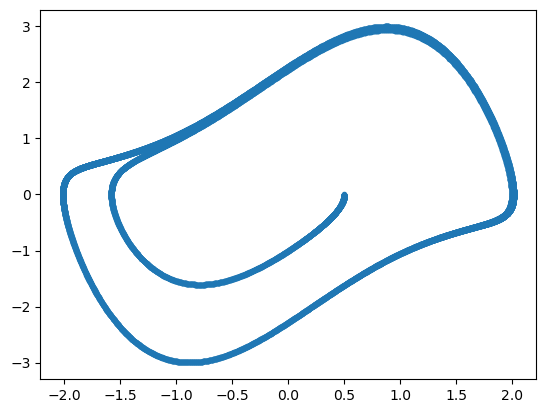

In [47]:
plt.scatter(sol[:,0],sol[:,1],marker='.')

In [48]:
def IntegratorAdams(f,r0,t,mu):
    
    h = t[1] - t[0]
    print(h)
    
    x = np.zeros_like(t)
    vx = np.zeros_like(t)
    
    x[0] = r0[0]
    vx[0] = r0[1]
    
    # RungeKutta4
    for i in range(1,4):
        present = np.array([x[i],vx[i]])
        K11 = f(present,t[i],mu)
        K12 = f(present+0.5*K11*h,t[i]+0.5*h,mu)
        K13 = f(present+0.5*K12*h,t[i]+0.5*h,mu)
        K14 = f(present+K13*h,t[i]+h,mu)
    
        x[i] = x[i-1] + h*(K11[0]+2*K12[0]+2*K13[0]+K14[0])/6
        vx[i] = vx[i-1] + h*(K11[1]+2*K12[1]+2*K13[1]+K14[1])/6
    
    xc = x.copy()
    vxc = vx.copy()
    
    for i in range(4,len(t)):
        
        # Bashforth
        
        present = np.array([x[i-1],vx[i-1]])
        past = np.array([x[i-2],vx[i-2]])
        past2 = np.array([x[i-3],vx[i-3]])
        past3 = np.array([x[i-4],vx[i-4]])
        
        K11 = f(present,t[i-1],mu)
        K12 = f(past,t[i-2],mu)
        K13 = f(past2,t[i-3],mu)
        K14 = f(past3,t[i-4],mu)
        
        x[i] = x[i-1] + (55*h*K11[0]/24 - 59*h*K12[0]/24 + 37*h*K13[0]/24 -3*h*K14[0]/8)
        vx[i] = vx[i-1] + (55*h*K11[1]/24 - 59*h*K12[1]/24 + 37*h*K13[1]/24 -3*h*K14[1]/8)
        
        xc[i] = x[i]
        vxc[i] = vx[i]
        
        # Moulton
        futuro = np.array([x[i],vx[i]])
        K15 = f(futuro,t[i],mu)
        
        xc[i] = xc[i-1] + (251*h*K15[0]/720 + 323*h*K11[0]/360 -11*h*K12[0]/30 + 53*h*K13[0]/360 - 19*h*K14[0]/720)
        vxc[i] = vxc[i-1] + (251*h*K15[1]/720 + 323*h*K11[1]/360 -11*h*K12[1]/30 + 53*h*K13[1]/360 - 19*h*K14[1]/720)
    
    return x,vx,xc,vxc

In [49]:
sol2 = IntegratorAdams(System,r0,t,1.3)

0.002000200020002


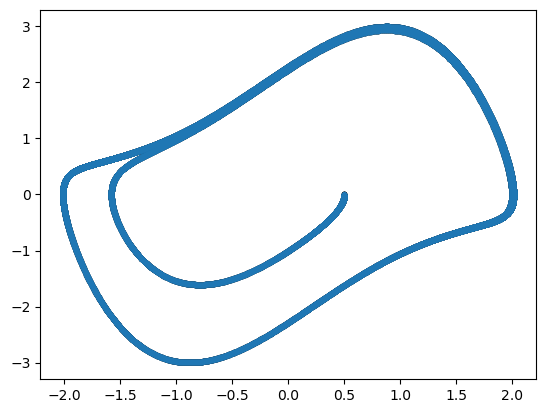

In [50]:
#plt.scatter(sol2[0],sol2[1],color='r')
plt.scatter(sol2[2],sol2[3],marker='.',color='k')
plt.scatter(sol[:,0],sol[:,1],marker='.')

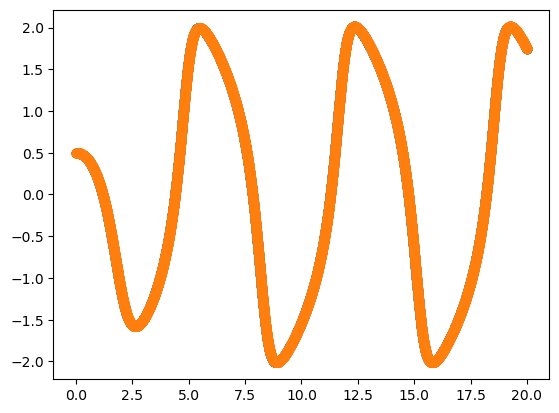

In [51]:
plt.scatter(t,sol[:,0])
plt.scatter(t,sol2[2])

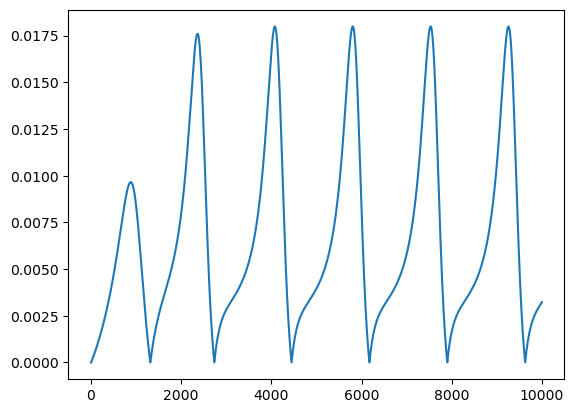

In [52]:
plt.plot(np.abs(sol2[2]-sol[:,0]))